Import the Required Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read the Data

In [43]:
df = pd.read_csv('2022_02_08-02_30_31_AM.csv')
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


Get the Shape of the Data

In [44]:
print(df.shape)

(13730000, 6)


Get the Column Names

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   uuid              object
 1   price_string      object
 2   price_string_unf  object
 3   product_type      object
 4   level_1           object
 5   category          object
dtypes: object(6)
memory usage: 628.5+ MB


Generate the Descriptive Statistics for the Data

In [46]:
df.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,13730000,5510000,310000,13720000,13680000,13720000
unique,1373,248,26,321,595,13
top,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,$6.75,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U3dlYXRzaGlydA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,240000,30000,200000,90000,3910000


Check for Missing Values

In [47]:
df.isnull().sum()

uuid                       0
price_string         8220000
price_string_unf    13420000
product_type           10000
level_1                50000
category               10000
dtype: int64

1. Products without Prices

In [60]:
df2 = df[df['price_string'].isnull()]['uuid']
df2

0           638744a4-b0ae-4166-8cb6-5c063c862036
1           ab313969-02cc-48b2-9daf-0054efb70b92
5           389d9f75-cc3f-4bd2-94f7-93e381a3bed5
13          1f2766ec-0a27-43f8-b28b-77a44492ead1
16          7bad39f5-74b9-4611-afb9-46fb135190cd
                            ...                 
13729992    8d763911-79b7-402d-8964-6bfe89692c66
13729993    2dc182aa-d591-49e4-85d1-5c4a60a09664
13729995    2a13338e-9268-4f7b-9e7c-b8c41c72971b
13729997    679f073a-862a-4e43-b5ce-41e45afd3bfa
13729998    25677eee-c26b-4abf-bd10-ca77a800ba26
Name: uuid, Length: 8220000, dtype: object

In [61]:
print("There are {} unique rows in the dataset".format(df['uuid'].nunique()))

There are 1373 unique rows in the dataset


In [62]:
df2.drop_duplicates().to_frame().reset_index()

,index,uuid
0,0,638744a4-b0ae-4166-8cb6-5c063c862036
1,1,ab313969-02cc-48b2-9daf-0054efb70b92
2,5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5
3,13,1f2766ec-0a27-43f8-b28b-77a44492ead1
4,16,7bad39f5-74b9-4611-afb9-46fb135190cd
...,...,...
817,7024,c174d758-aa8f-4c1c-afa9-2ded6e6b6a0d
818,7131,0c4f4319-4a18-4edc-a40d-133b3f4cef5c
819,7456,2d4deea7-b7c2-4342-8488-337c5eacaa84
820,8788,62785956-705e-47db-bd0e-764575333724


2. Count of products without prices and with prices in each Product Type, Category, Level 1

In [8]:
df[df['price_string'].isnull()].count()

uuid                8220000
price_string              0
price_string_unf      70000
product_type        8210000
level_1             8180000
category            8210000
dtype: int64

Count of products whose 

In [9]:
df[df['price_string'].isnull()]['product_type'].count()

8210000

In [10]:
df[df['price_string'].notnull()]['product_type'].count()

5510000

In [11]:
df[df['price_string'].isnull()]['category'].count()

8210000

In [12]:
df[df['price_string'].notnull()]['category'].count()

5510000

In [13]:
df[df['price_string'].isnull()]['level_1'].count()

8180000

In [14]:
df[df['price_string'].notnull()]['level_1'].count()

5500000

3. Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns

In [15]:
df['price_string'] = np.where(df['price_string'].isnull(), "$0.00", df['price_string'])

In [16]:
df.head(3)

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,$0.00,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo


In [17]:
df.isnull().sum()

uuid                       0
price_string               0
price_string_unf    13420000
product_type           10000
level_1                50000
category               10000
dtype: int64

In [18]:
def check_format(x):
    if '$' in x:
        return x
    else:
        return "$" + x

In [19]:
df['price_string'] = df['price_string'].apply(check_format)

In [20]:
df.head(2)

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,$0.00,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw


In [21]:
df['currency'] = df['price_string'].apply(lambda x: x[0])
df['value'] = df['price_string'].apply(lambda x: x[1:])

In [22]:
df.head(2)

,uuid,price_string,price_string_unf,product_type,level_1,category,currency,value
0,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,$,0.00
1,ab313969-02cc-48b2-9daf-0054efb70b92,$0.00,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,$,0.00


4. List out the categories with average price of product.

In [23]:
df['value'] = pd.to_numeric(df['value'])

In [29]:
average_price = df.groupby('category')[['value']].mean().reset_index()
average_price

,category,value
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,59.659795
1,QXJ0IHN1cHBsaWVz,11.560937
2,QmFieWNhcmU,22.321212
3,RWxlY3Ryb25pY3M,20.713750
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,33.974076
5,SGVhbHRo,9.537071
6,VG95cyBhbmQgR2FtZXM,7.804177
7,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,31.624423
8,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,17.727075
9,Z3JvY2VyaWVz,3.142857


In [30]:
average_price = average_price.sort_values(by='value', ascending=False)
average_price

,category,value
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,59.659795
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,33.974076
7,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,31.624423
2,QmFieWNhcmU,22.321212
3,RWxlY3Ryb25pY3M,20.713750
8,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,17.727075
11,b2ZmaWNlIHByb2R1Y3Rz,13.356522
1,QXJ0IHN1cHBsaWVz,11.560937
10,a2l0Y2hpbmcgYW5kIGRpbmluZw,9.625593
5,SGVhbHRo,9.537071


Using Graphs to visualize the data

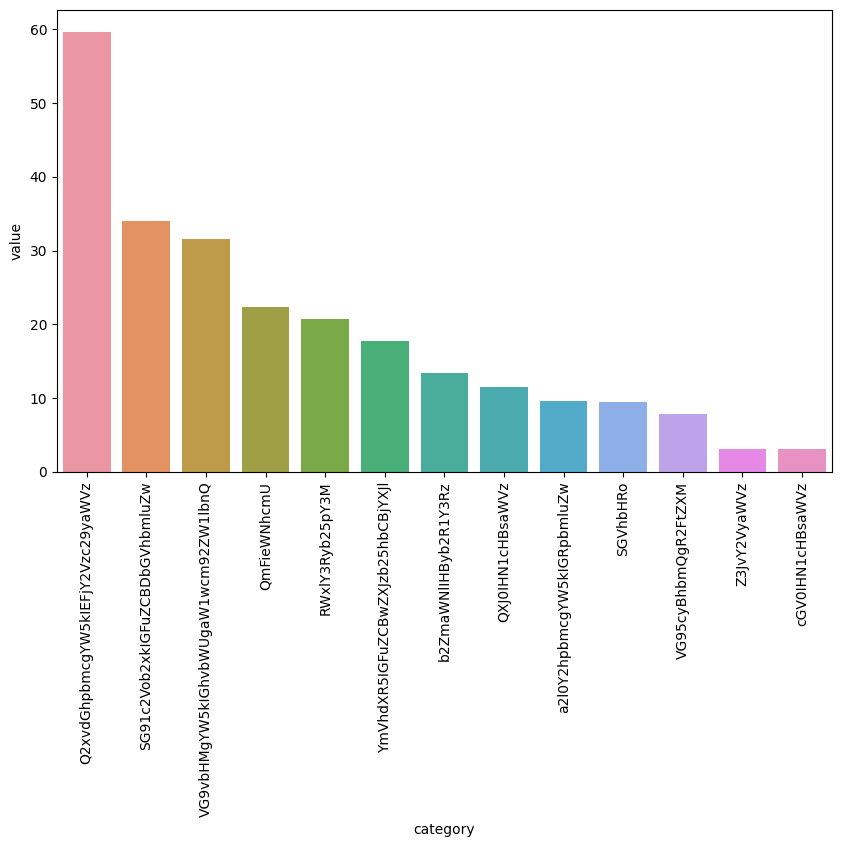

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='value', data=average_price)
plt.xticks(rotation=90)
plt.show()

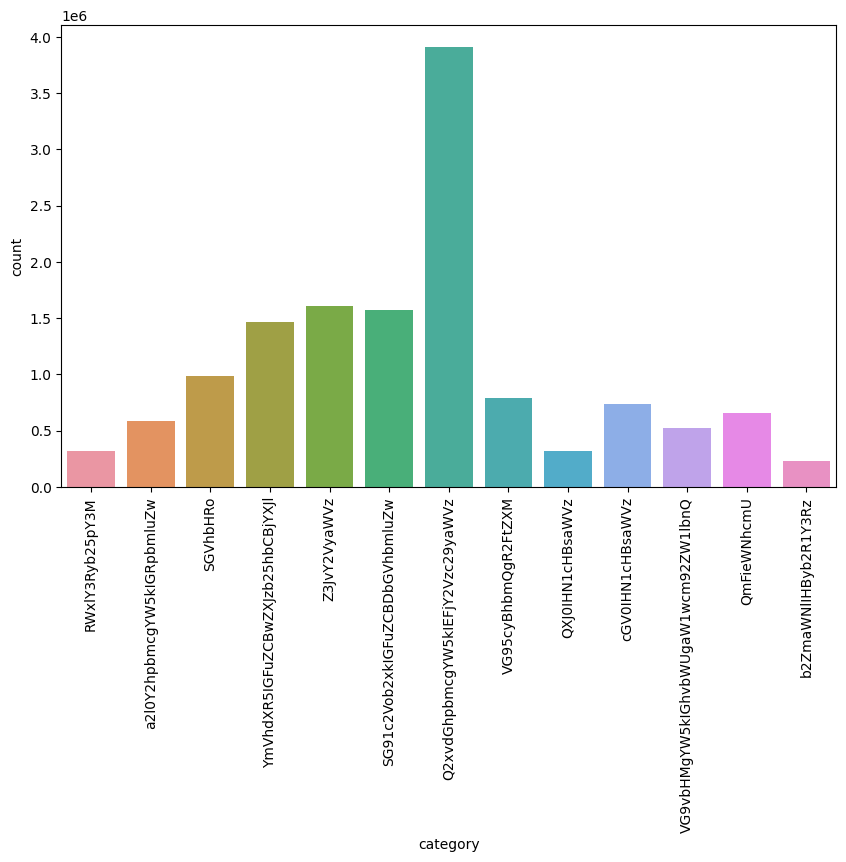

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xticks(rotation=90)
plt.show()

Required Libraries for the Project with their versions

In [35]:
print(
    "\n".join(
        f"{m.__name__}=={m.__version__}"
        for m in globals().values()
        if getattr(m, "__version__", None)
    )
)

numpy==1.23.3
pandas==1.5.0
seaborn==0.12.0
